![](https://assets.website-files.com/60e7f71b22c6d0b9cf329ceb/621e1a2f28ded71ee95aeede_6ProvenSalesForecastingMethodstoDriveRevenue1_a117440b5ae227c3dba5264a6521da06_2000.png)

# Introdução

O objetivo deste projeto é desenvolver um modelo de regressão para prever o número de vendas da empresa **Frexco**, baseado no dia, mês e ano. Para desenvolver esse modelo serão utilizadas técnicas de machine learning e serão testados os desempenhos de diferentes algoritmos de regressão.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Dados.xlsx', index_col=0)

In [3]:
df = df.reset_index(level=0)

In [4]:
df.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [5]:
df['Data'] = df['Data'].astype(str)

In [6]:
df[['Ano', 'Mes', 'Dia']] = df['Data'].str.split('-', expand=True).astype(int)
df.head()

,Data,Vendas,Ano,Mes,Dia
0,2022-12-06,870,2022,12,6
1,2022-12-07,868,2022,12,7
2,2022-12-08,1189,2022,12,8
3,2022-12-09,742,2022,12,9
4,2022-12-10,317,2022,12,10


# Análise Exploratória de Dados (EDA)

In [7]:
import seaborn as sns
import plotly.express as px

In [8]:
px.histogram(df,x='Vendas',marginal='rug',template='seaborn',labels={'Vendas':'Número de vendas'},title="<b> Distribuição do número de vendas")

A maior frequência de número de vendas está no intervalo de 800 a 1000 vendas.

In [9]:
vendas = np.array(df['Vendas'])

In [10]:
fig = px.line(df, x="Data", y="Vendas", labels={'Data':'dia','Vendas':'vendas'}, template="seaborn",title="<b> Número de vendas por dia")
fig.show()

In [11]:
df = df.sort_values('Vendas', ascending=False).reset_index(drop=True)

In [12]:
z = df[['Data', 'Vendas']]

In [13]:
fig=px.bar(z,x='Data',y='Vendas',color='Data',
           labels={'Data':'data','Vendas':'vendas'},text='Vendas',template='seaborn',title="<b> Top datas com maior número de vendas")

fig.update_layout(
xaxis_type = 'category'
)

fig.show()

In [14]:
z = df[df['Dia'] <= 20]
z = df.groupby('Mes', as_index=False)[['Vendas']].sum().sort_values(by='Vendas',ascending=False)
z = z.replace(1, 'Janeiro de 2023')
z = z.replace(12, 'Dezembro de 2022')

In [15]:
fig=px.bar(z,x='Mes',y='Vendas',color='Mes',
           labels={'Mes':'mês','Vendas':'vendas'},text='Vendas',template='seaborn',title="<b> Total de vendas dos primeiros 20 dias do mês")

fig.show()

# Machine Learning

## Análise das features

Como queremos calcular a correlação entre features categóricas e numéricas, será utilizada a medida de **correlation ratio (eta)**.

In [16]:
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2
        
    Eta = (ssb / (ssb + ssw))**.5

    return Eta

In [17]:
Dia_coef = correlation_ratio(df['Dia'], df['Vendas'])
Mes_coef = correlation_ratio(df['Mes'], df['Vendas'])
Ano_coef = correlation_ratio(df['Ano'], df['Vendas'])

features_corr = {
                 'Dia':Dia_coef
                ,'Mês':Mes_coef
                ,'Ano':Ano_coef
                 }

In [18]:
features_corr = sorted(features_corr.items(), key=lambda x: x[1], reverse=True)

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

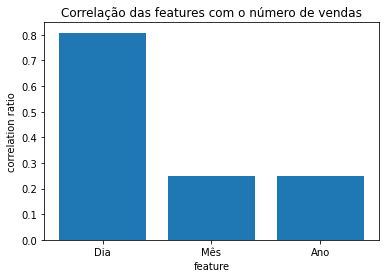

In [20]:
names = list(zip(*features_corr))[0]
values = list(zip(*features_corr))[1]

plt.bar(range(len(features_corr)), values, tick_label=names)
plt.title('Correlação das features com o número de vendas')
plt.xlabel('feature')
plt.ylabel('correlation ratio')
plt.show()

A variável mais relacionada com o número de vendas é o **dia**. O **mês** e **ano** possuem menos importância, mas **não** uma importância insignificativa.

## Data Visualization

In [21]:
data = df.drop(['Data'], axis=1)
data[['Ano', 'Mes', 'Dia']] = data[['Ano', 'Mes', 'Dia']].astype(str)

# one hot encoding variáveis categóricas
data = pd.get_dummies(data)

In [22]:
data.head()

,Vendas,Ano_2022,Ano_2023,Mes_1,Mes_12,Dia_1,Dia_10,Dia_11,Dia_12,Dia_13,...,Dia_29,Dia_3,Dia_30,Dia_31,Dia_4,Dia_5,Dia_6,Dia_7,Dia_8,Dia_9
0,1692,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1405,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1366,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1343,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1317,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Vendas    46 non-null     int64
 1   Ano_2022  46 non-null     uint8
 2   Ano_2023  46 non-null     uint8
 3   Mes_1     46 non-null     uint8
 4   Mes_12    46 non-null     uint8
 5   Dia_1     46 non-null     uint8
 6   Dia_10    46 non-null     uint8
 7   Dia_11    46 non-null     uint8
 8   Dia_12    46 non-null     uint8
 9   Dia_13    46 non-null     uint8
 10  Dia_14    46 non-null     uint8
 11  Dia_15    46 non-null     uint8
 12  Dia_16    46 non-null     uint8
 13  Dia_17    46 non-null     uint8
 14  Dia_18    46 non-null     uint8
 15  Dia_19    46 non-null     uint8
 16  Dia_2     46 non-null     uint8
 17  Dia_20    46 non-null     uint8
 18  Dia_21    46 non-null     uint8
 19  Dia_22    46 non-null     uint8
 20  Dia_23    46 non-null     uint8
 21  Dia_24    46 non-null     uint8
 22  Dia_

In [24]:
# descrição da coluna de vendas
data.describe()['Vendas']

count      46.000000
mean      755.434783
std       430.762201
min        18.000000
25%       346.500000
50%       810.500000
75%      1053.750000
max      1692.000000
Name: Vendas, dtype: float64

In [25]:
# checando nulos
data.isnull().sum()

Vendas      0
Ano_2022    0
Ano_2023    0
Mes_1       0
Mes_12      0
Dia_1       0
Dia_10      0
Dia_11      0
Dia_12      0
Dia_13      0
Dia_14      0
Dia_15      0
Dia_16      0
Dia_17      0
Dia_18      0
Dia_19      0
Dia_2       0
Dia_20      0
Dia_21      0
Dia_22      0
Dia_23      0
Dia_24      0
Dia_25      0
Dia_26      0
Dia_27      0
Dia_28      0
Dia_29      0
Dia_3       0
Dia_30      0
Dia_31      0
Dia_4       0
Dia_5       0
Dia_6       0
Dia_7       0
Dia_8       0
Dia_9       0
dtype: int64

## Load data

In [26]:
X = data.drop('Vendas', axis=1)
y = np.array(data['Vendas'])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Rescaling features

Só é necessário reescalar a coluna de **'Vendas'**, pois as outras features são categóricas e já estão codificadas pelo one-hot-encoding.



In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

scaler.fit(pd.DataFrame(y_train))

y_train = np.concatenate(scaler.transform(pd.DataFrame(y_train)), axis=0)
y_test = np.concatenate(scaler.transform(pd.DataFrame(y_test)), axis=0)
y_val = np.concatenate(scaler.transform(pd.DataFrame(y_val)), axis=0)

## Build Model

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
import xgboost as xgb

### Otimização de hiperparâmetros

Aqui será utilizada a técnica de **Otimização Bayesiana com Hyperot**, para otimizar os parâmetros dos modelos **XGBoost**, **Random forest** e **Lasso**

In [32]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_squared_error

#### XGBoost

In [33]:
XGB_space={'max_depth':hp.quniform("max_depth", 3, 18, 1),
        'learning_rate':hp.uniform('learning_rate', 0, 1),
        'colsample_bytree':hp.uniform('colsample_bytree', 0,1),
        'alpha':hp.quniform('alpha', 0, 10, 1),
        'n_estimators':hp.quniform('n_estimators', 100, 200, 1),
        'objective':'reg:linear',
        'seed':42,
        'verbosity':0
    }

In [34]:
def XGB_objective_function(space):
    model=xgb.XGBRegressor(
                    n_estimators =int(space['n_estimators']),max_depth = int(space['max_depth']),
                    alpha = int(space['alpha']),learning_rate=space['learning_rate'],
                    colsample_bytree=space['colsample_bytree'], seed=space['seed'],
                    objective=space['objective'], verbosity=space['verbosity'])
    
    evaluation = [( X_train, y_train), ( X_val, y_val)]
    
    model.fit(X_train, y_train, eval_set=evaluation, early_stopping_rounds=10, verbose=False)

    y_pred = model.predict(X_val)

    msr = mean_squared_error(y_val,y_pred)

    return {'loss': msr, 'status': STATUS_OK }

#### Lasso

In [35]:
Lasso_space={'alpha':hp.uniform('alpha', 0, 1)}

In [36]:
def Lasso_objective_function(space):
    model = linear_model.Lasso(alpha=space['alpha'])
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    msr = mean_squared_error(y_val,y_pred)

    return {'loss': msr, 'status': STATUS_OK }

#### Random Forest

In [37]:
RF_space={'n_estimators':hp.quniform('n_estimators', 50, 150, 1)}

In [38]:
def RF_objective_function(space):
    model = RandomForestRegressor(n_estimators=int(space['n_estimators']))
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)

    msr = mean_squared_error(y_val,y_pred)

    return {'loss': msr, 'status': STATUS_OK }

#### Resultados da otimização de hiperparâmetros

In [39]:
trials = Trials()
print("XGB optimization:")
XGB_best_hyperparams = fmin(fn = XGB_objective_function,
                        space = XGB_space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

trials = Trials()
print("Lasso optimization:")
Lasso_best_hyperparams = fmin(fn = Lasso_objective_function,
                        space = Lasso_space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

trials=Trials()
print("RF optimization:")
RF_best_hyperparams = fmin(fn = RF_objective_function,
                        space = RF_space,
                        algo = tpe.suggest,
                        max_evals = 25,
                        trials = trials)     

XGB optimization:
100%|██████████| 100/100 [00:09<00:00, 10.58it/s, best loss: 1.1809167963944895]
Lasso optimization:
100%|██████████| 100/100 [00:01<00:00, 64.65it/s, best loss: 1.6925720906865167]
RF optimization:
100%|██████████| 25/25 [00:08<00:00,  2.87it/s, best loss: 1.3114152539187391]


In [40]:
print("Melhores hiperparâmetros de cada modelo: ","\n")
print(f'XGB: {XGB_best_hyperparams}')
print(f'Lasso: {Lasso_best_hyperparams}')
print(f'RF: {RF_best_hyperparams}')

Melhores hiperparâmetros de cada modelo:  

XGB: {'alpha': 10.0, 'colsample_bytree': 0.8594232095869803, 'learning_rate': 0.37348164360558733, 'max_depth': 16.0, 'n_estimators': 179.0}
Lasso: {'alpha': 0.7841349185125062}
RF: {'n_estimators': 118.0}


In [41]:
# build models
RF_model = RandomForestRegressor(n_estimators=int(RF_best_hyperparams['n_estimators']))

Lasso_model = linear_model.Lasso(alpha=Lasso_best_hyperparams['alpha'])

XGB_model = xgb.XGBRegressor(objective ='reg:linear'
                                 , colsample_bytree = XGB_best_hyperparams['colsample_bytree']
                                 , learning_rate = XGB_best_hyperparams['learning_rate']
                                 , alpha = int(XGB_best_hyperparams['alpha'])
                                 , max_depth = int(XGB_best_hyperparams['max_depth'])
                                 , n_estimators = int(XGB_best_hyperparams['n_estimators'])
                                 , seed=42
                                 , verbosity=0)

#### Seleção do melhor modelo

Será utilizada a técnica de múltiplos splits **KFold** para estimar a performance de cada modelo no dataset.

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [43]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

XGB_results = cross_val_score(XGB_model, X_train, y_train, cv=kfold)
Lasso_results = cross_val_score(Lasso_model, X_train, y_train, cv=kfold)
RF_results = cross_val_score(RF_model, X_train, y_train, cv=kfold)

results = abs(np.array([XGB_results.mean(), Lasso_results.mean(), RF_results.mean()]))
results = {'XGBoost':results[0]
          ,'Lasso': results[1]
          ,'Random Forest':results[2]}
results = sorted(results.items(), key=lambda x: x[1], reverse=True)

In [44]:
results

[('XGBoost', 18.016174353582308),
 ('Random Forest', 7.806352094210972),
 ('Lasso', 4.374862554082796)]

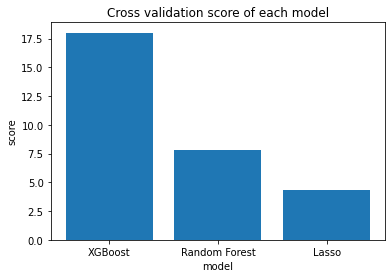

In [45]:
names = list(zip(*results))[0]
values = list(zip(*results))[1]

plt.bar(range(len(results)), values, tick_label=names)
plt.title('Cross validation score of each model')
plt.xlabel('model')
plt.ylabel('score')
plt.show()

O modelo **XGBoost** teve a melhor performance.

In [46]:
# get best model
model_flag = None
best_model = results[0][0]
if (best_model == 'XGBoost'):
    model = XGB_model
    model_flag = 0
elif(best_model == 'Lasso'):
    model = Lasso_model
    model_flag = 1
elif(best_model == 'Random Forest'):
    model = RF_model
    model_flag = 2

## Fit

In [47]:
model.fit(X_train, y_train)

XGBRegressor(alpha=10, colsample_bytree=0.8594232095869803,
             learning_rate=0.37348164360558733, max_depth=16, n_estimators=179,
             seed=42, verbosity=0)

## Evaluate

In [48]:
y_pred = model.predict(X_test)

In [49]:
mean_squared_error(y_test, y_pred)

1.7202952872185702

# Resultados

O **MSR** do modelo **XGBoost** foi de aproximadamente **1.72**

## Resultados do modelo **XGBoost** - Real vs Previsto

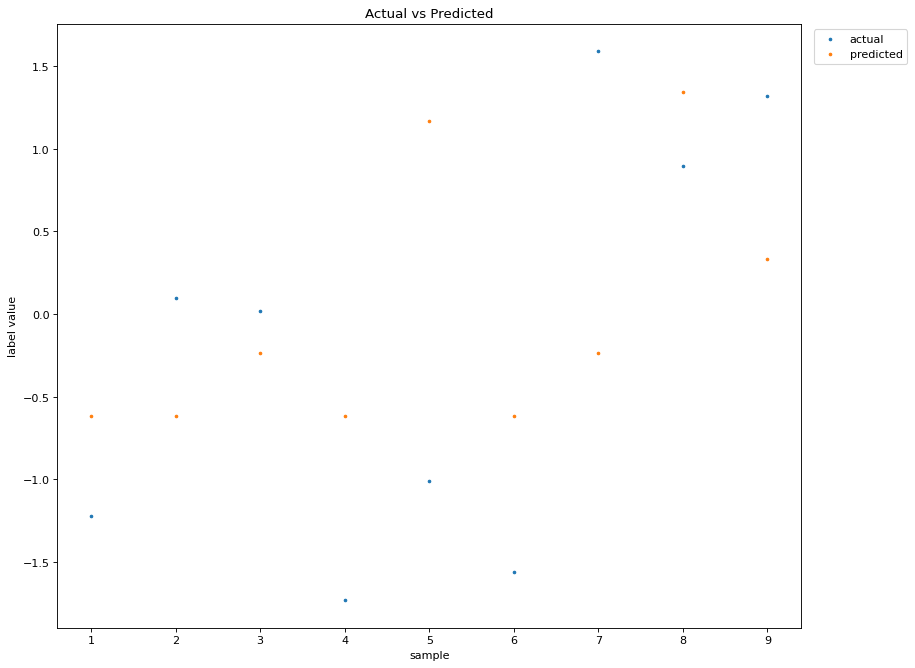

In [50]:
li1 = list(zip(range(1, len(y_test)), y_test))
li2 = list(zip(range(1, len(y_pred)), y_pred))

figure(figsize=(12, 10), dpi=80)
    
plt.ylabel('label value')
plt.xlabel('sample')

plt.scatter(*zip(*li1), s=5, label='actual')
plt.scatter(*zip(*li2), s=5, label='predicted')

plt.legend(bbox_to_anchor=(1.15, 1), loc="upper right")
plt.title("Actual vs Predicted")

plt.show()

## Análise da importância das Features

In [51]:
def get_feature_importances(model):
    day_importance = 0
    month_importance = 0
    year_importance = 0

    if model_flag == 0:
      feature_names = model.get_booster().feature_names
    else:
      feature_names = model.feature_names_in_
    
    for i in range(len(feature_names)):
        if 'Dia' in feature_names[i]:
            day_importance += model.feature_importances_[i]
        elif 'Mes' in feature_names[i]:
            month_importance += model.feature_importances_[i]
        elif 'Ano' in feature_names[i]:
            year_importance += model.feature_importances_[i]
            
    return {'Dia':day_importance, 'Mês':month_importance
            , 'Ano':year_importance}

In [52]:
feature_importances = sorted(get_feature_importances(model).items(), key=lambda x: x[1], reverse=True)

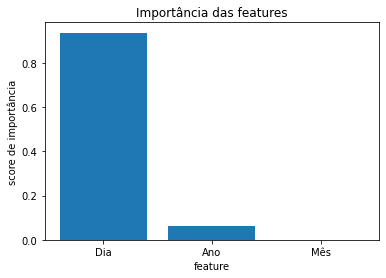

In [53]:
names = list(zip(*feature_importances))[0]
values = list(zip(*feature_importances))[1]

plt.bar(range(len(feature_importances)), values, tick_label=names)
plt.title('Importância das features')
plt.xlabel('feature')
plt.ylabel('score de importância')
plt.show()

Disparadamente a variável mais importante nas previsões do modelo é o **dia**. Mês e ano possuem importâncias próximas de zero e portanto não são significantes para esse modelo.

# Conclusão

O modelo com melhor performance no dataset foi o **XGBoost**. A falta de amostras e features no dataset certamente está causando um cenário de underfitting no modelo, o que dificulta as previsões e a estimativa da performance do modelo. O gráfico "Real vs Previsto" mostra que algumas previsões foram próximas, como na amostra **3**. Enquanto em outras amostras a previsão foi mais distante, por exemplo na amostra **5**.

*Muito obrigado por vir até o fim :)*